<a href="https://colab.research.google.com/github/BartoszJanJerzy/M-L-Bootcamp-cz.1/blob/master/18_przeszukiwanie_siatki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)

#Generowanie danych

In [4]:
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

df = pd.DataFrame(data=np.c_[data,target], columns=['x1','x2','target'])
df

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0
...,...,...,...
1995,0.259746,0.107342,1.0
1996,0.363180,-0.404324,1.0
1997,-0.982272,0.685059,0.0
1998,0.789171,-0.827167,1.0


###Zbiór treningowy i testowy

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

#Wybór optymalnych parametrów - vol.1

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

cls = DecisionTreeClassifier()

params= {'max_depth':np.arange(1, 10),
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,15,20]}

grid_search = GridSearchCV(cls, # model
                           param_grid=params, # siatka parametrów 
                           scoring='accuracy', # wg jakiej cechy oceniony będzie model
                           cv=5) # walidacja krzyżowa
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
    

In [9]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 7}

###Wizualizacja

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



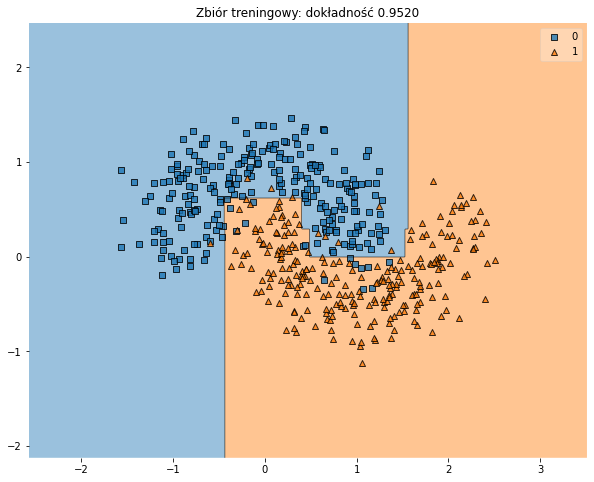

In [10]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_test,y_test):.4f}')
plt.show()

#Wybór optymalnych parametrów - vol.2

In [15]:
cls = DecisionTreeClassifier()

params= {'criterion':['gini','entropy'],
         'max_depth':np.arange(1, 10),
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,15,20],}

'''
MOŻNA TEŻ PODAĆ SIATKĘ JAKO LISTĘ SŁOWNIKÓW

params = [
  {'criterion':['gini'], 'max_depth':[1,2,3,4,5]},
  {'criterion':['entropy'], 'max_depth':[2,3,4,5]}
]
'''

grid_search = GridSearchCV(cls, # model
                           param_grid=params, # siatka parametrów 
                           scoring='accuracy', # wg jakiej cechy oceniony będzie model
                           cv=5) # walidacja krzyżowa
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [12]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 8}

In [13]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



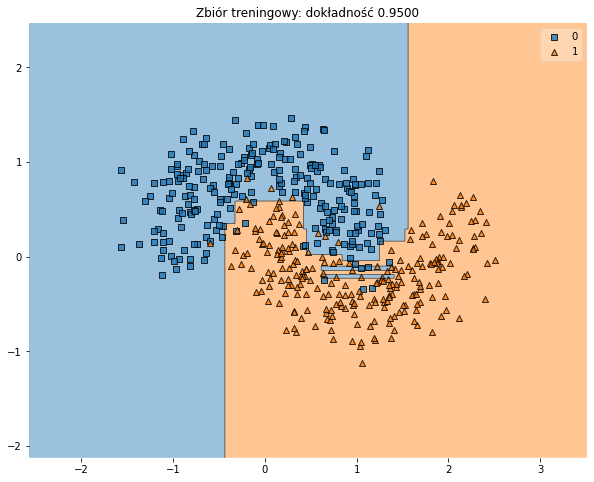

In [14]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_test,y_test):.4f}')
plt.show()

#Wybór optymalnych parametrów - vol.3: przykład lasów losowych

In [16]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier(random_state=42)

param_grid={
    'criterion':['gini','entropy'],
    'max_depth':np.arange(4,10),
    'min_samples_leaf':[4,5,6,7,8,9,10],
    'n_estimators':[50]
}

grid_search = GridSearchCV(cls, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [17]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 10,
 'n_estimators': 50}

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



Text(0.5, 1.0, 'Zbiór testowy: dokładność 0.9500')

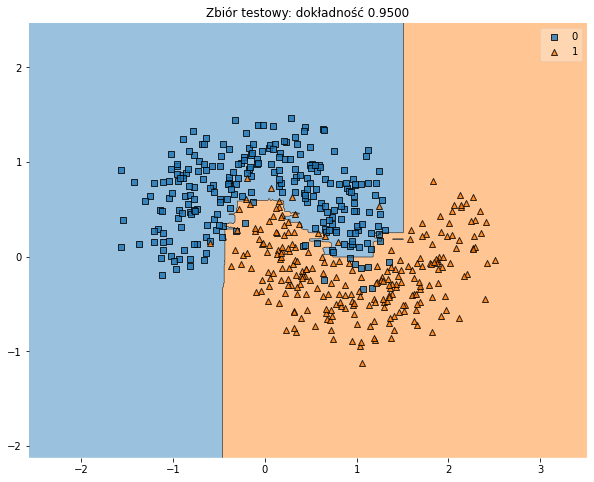

In [20]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test,y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')